# Bond Price vs Yield Relationship

This notebook demonstrates the inverse relationship between bond prices and yields for bonds of different maturities (5-year, 10-year, and 30-year).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for our plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

## Define Bond Pricing Function

We'll implement a function to calculate bond prices based on yield, maturity, coupon rate, and face value.

In [2]:
def calculate_bond_price(face_value, coupon_rate, years_to_maturity, yield_rate, payments_per_year=2):
    """
    Calculate the price of a bond based on its characteristics.
    
    Parameters:
    - face_value: The par value of the bond (amount paid at maturity)
    - coupon_rate: Annual coupon rate (as a decimal)
    - years_to_maturity: Number of years until the bond matures
    - yield_rate: Market yield rate (as a decimal)
    - payments_per_year: Number of coupon payments per year (default is 2 for semi-annual)
    
    Returns:
    - price: The calculated price of the bond
    """
    # Calculate the per-period values
    periods = years_to_maturity * payments_per_year
    periodic_coupon_rate = coupon_rate / payments_per_year
    periodic_yield_rate = yield_rate / payments_per_year
    coupon_payment = face_value * periodic_coupon_rate
    
    # Calculate the present value of all coupon payments
    coupon_pv = 0
    for t in range(1, periods + 1):
        coupon_pv += coupon_payment / (1 + periodic_yield_rate) ** t
    
    # Calculate the present value of the face value (paid at maturity)
    face_value_pv = face_value / (1 + periodic_yield_rate) ** periods
    
    # The bond price is the sum of these present values
    price = coupon_pv + face_value_pv
    
    return price

## Generate Data for Different Bond Maturities

We'll generate price data for 5-year, 10-year, and 30-year bonds across a range of yields. 
For simplicity, we'll assume all bonds have a face value of $1,000 and a coupon rate of 3%.

In [3]:
# Define bond parameters
face_value = 1000
coupon_rate = 0.03  # 3% annual coupon rate
maturities = [5, 10, 30]  # 5-year, 10-year, and 30-year bonds

# Define range of yield rates to evaluate (from 0.5% to 8%)
yield_rates = np.linspace(0.005, 0.08, 100)

# Create a DataFrame to store the results
results = pd.DataFrame()
results['Yield (%)'] = yield_rates * 100  # Convert to percentage for display

# Calculate bond prices for each maturity at different yields
for maturity in maturities:
    prices = [calculate_bond_price(face_value, coupon_rate, maturity, y) for y in yield_rates]
    results[f'{maturity}-Year Bond Price ($)'] = prices

# Display the first few rows of our results
results.head()

,Yield (%),5-Year Bond Price ($),10-Year Bond Price ($),30-Year Bond Price ($)
0,0.500000,1123.298299,1243.556104,1695.654471
1,0.575758,1119.314824,1235.248591,1667.049030
2,0.651515,1115.347518,1227.003957,1639.025222
3,0.727273,1111.396307,1218.821691,1611.570387
4,0.803030,1107.461122,1210.701289,1584.672151


## Visualize the Price-Yield Relationship

Now we'll create a chart to show how bond prices change with yields for different maturities.

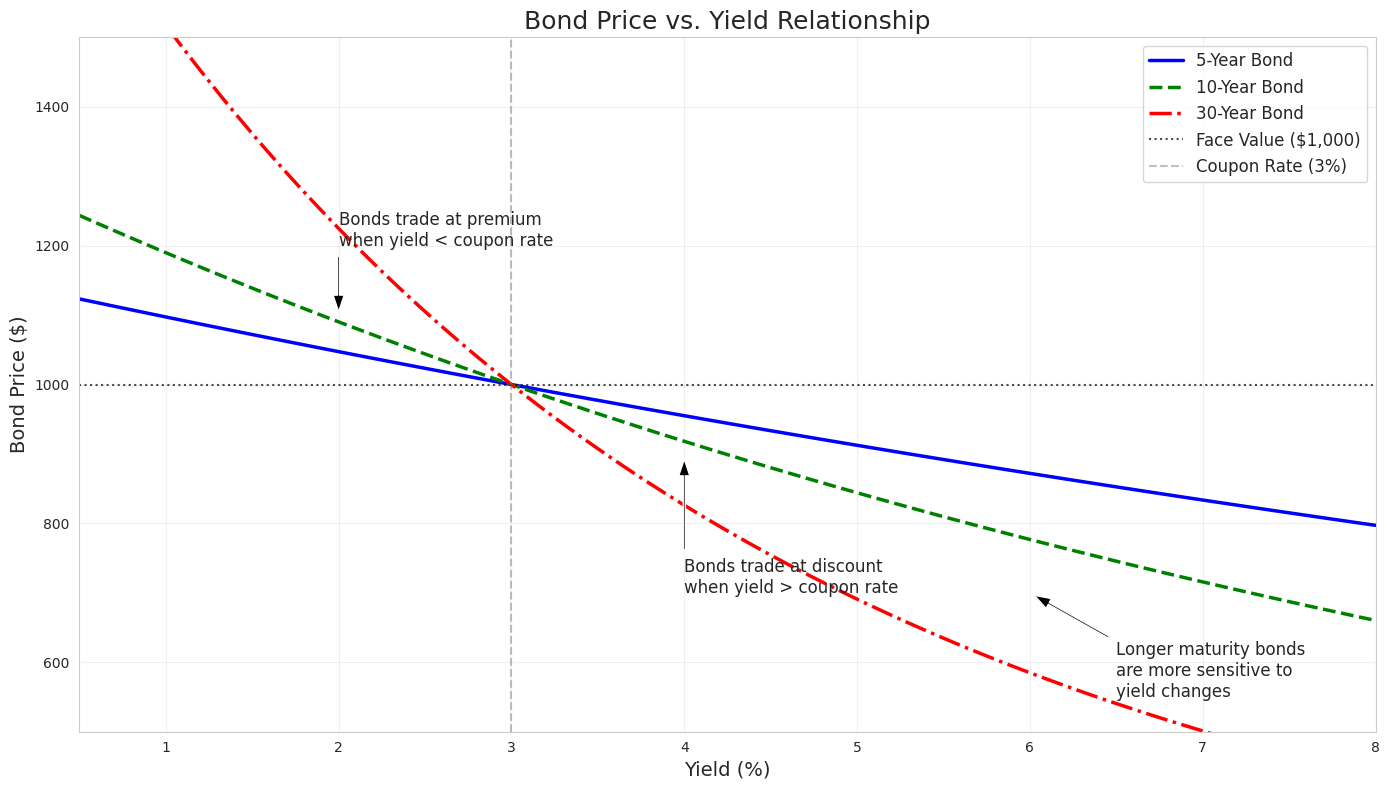

In [4]:
plt.figure(figsize=(14, 8))

# Plot each bond maturity with a different color and line style
plt.plot(results['Yield (%)'], results['5-Year Bond Price ($)'], 'b-', linewidth=2.5, label='5-Year Bond')
plt.plot(results['Yield (%)'], results['10-Year Bond Price ($)'], 'g--', linewidth=2.5, label='10-Year Bond')
plt.plot(results['Yield (%)'], results['30-Year Bond Price ($)'], 'r-.', linewidth=2.5, label='30-Year Bond')

# Add a horizontal line at the face value ($1,000)
plt.axhline(y=face_value, color='k', linestyle=':', alpha=0.7, label='Face Value ($1,000)')

# Add a vertical line at the coupon rate (3%)
plt.axvline(x=coupon_rate*100, color='grey', linestyle='--', alpha=0.5, label='Coupon Rate (3%)')

# Customize the plot
plt.title('Bond Price vs. Yield Relationship', fontsize=18)
plt.xlabel('Yield (%)', fontsize=14)
plt.ylabel('Bond Price ($)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Set axis limits
plt.xlim(0.5, 8)
plt.ylim(500, 1500)

# Add annotations to explain key points
plt.annotate('Bonds trade at premium\nwhen yield < coupon rate', 
             xy=(2, 1100), 
             xytext=(2, 1200),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             fontsize=12)

plt.annotate('Bonds trade at discount\nwhen yield > coupon rate', 
             xy=(4, 900), 
             xytext=(4, 700),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             fontsize=12)

plt.annotate('Longer maturity bonds\nare more sensitive to\nyield changes', 
             xy=(6, 700), 
             xytext=(6.5, 550),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             fontsize=12)

plt.tight_layout()
plt.show()

## Understanding Bond Price Sensitivity

Let's calculate and visualize the price sensitivity of bonds of different maturities to changes in yield. This concept is known as bond duration.

In [6]:
# Calculate the percentage change in price for a 1% change in yield
initial_yield = 0.03  # 3%
change_amount = 0.01  # 1 percentage point increase

sensitivity_data = []

for maturity in maturities:
    # Calculate initial price at 3% yield
    initial_price = calculate_bond_price(face_value, coupon_rate, maturity, initial_yield)
    
    # Calculate new price after yield increases to 4%
    new_price = calculate_bond_price(face_value, coupon_rate, maturity, initial_yield + change_amount)
    
    # Calculate percentage change in price
    price_change_pct = (new_price - initial_price) / initial_price * 100
    
    sensitivity_data.append({
        'Maturity (Years)': maturity,
        'Initial Price ($)': round(initial_price, 2),
        'New Price ($)': round(new_price, 2),
        'Price Change (%)': round(price_change_pct, 2)
    })

sensitivity_df = pd.DataFrame(sensitivity_data)
sensitivity_df

,Maturity (Years),Initial Price ($),New Price ($),Price Change (%)
0,5,1000.0,955.09,-4.49
1,10,1000.0,918.24,-8.18
2,30,1000.0,826.20,-17.38


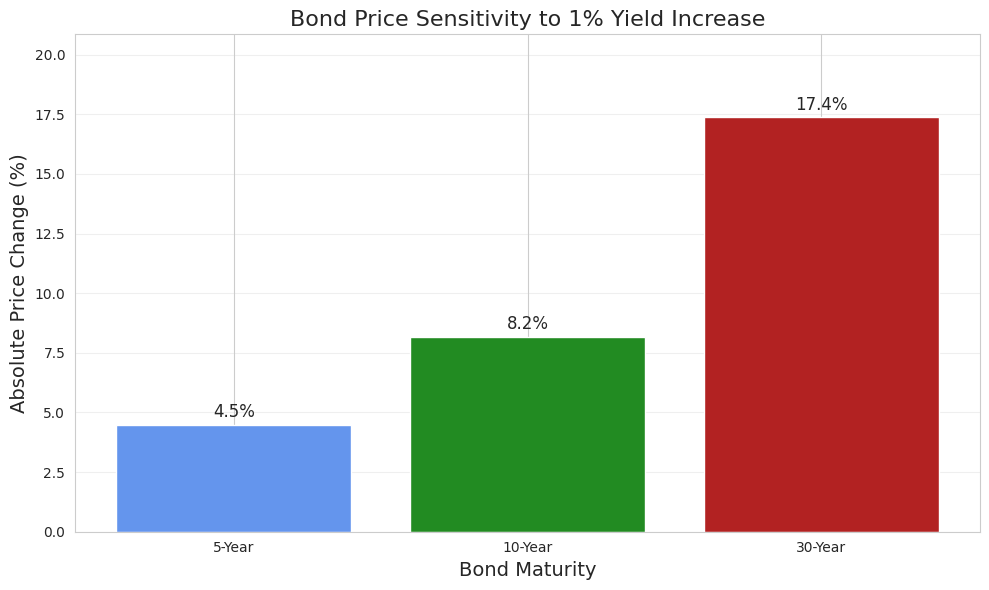

In [7]:
# Visualize price sensitivity
plt.figure(figsize=(10, 6))
bars = plt.bar(sensitivity_df['Maturity (Years)'].astype(str) + '-Year', 
        abs(sensitivity_df['Price Change (%)']),
        color=['cornflowerblue', 'forestgreen', 'firebrick'])

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{height:.1f}%', ha='center', fontsize=12)

plt.title('Bond Price Sensitivity to 1% Yield Increase', fontsize=16)
plt.xlabel('Bond Maturity', fontsize=14)
plt.ylabel('Absolute Price Change (%)', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(abs(sensitivity_df['Price Change (%)'])) * 1.2)  # Add some space for labels

plt.tight_layout()
plt.show()

## Key Observations

1. **Inverse Relationship**: Bond prices and yields have an inverse relationship. When yields rise, bond prices fall, and vice versa.

2. **Maturity Effect**: Longer-term bonds (e.g., 30-year) show greater price sensitivity to yield changes compared to shorter-term bonds (e.g., 5-year).

3. **Premium and Discount**: Bonds trade at a premium when the yield is lower than the coupon rate, and at a discount when the yield is higher than the coupon rate.

4. **Convexity**: The price-yield curve is convex, not linear, which means the rate of price change is not constant across different yield levels.